In [ ]:
def PlotFunction(val, nval):
  import pandas as pd
  import datetime
  df = pd.read_csv("/content/drive/Shareddrives/Major Project/Data/formatted csv/convert bhargavnath/"+str(val)+".csv",names=['ID', 'NAN', 'T1', 'V1', 'T2','V2', 'T3', 'V3','T4','V4','T5','V5','X1','X2','NAN1','NAN2','NAN3','NAN4'])
  df.head()
  df.drop(index=df.index[0], axis=0, inplace=True)
  df.drop(index=df.index[0], axis=0, inplace=True)
  df.drop(index=df.index[0], axis=1, inplace=True)
  df.drop(index=df.index[0], axis=1, inplace=True)
  df.V1 = pd.to_numeric(df.V1)
  mean_V1 = df.V1.mean()
  print("V1 mean:",mean_V1)

  df.V2 = pd.to_numeric(df.V2)
  mean_V2 = df.V2.mean()
  print("V2 mean:",mean_V2)

  df.V3 = pd.to_numeric(df.V3)
  mean_V3 = df.V3.mean()
  print("V3 mean:",mean_V3)

  df.V4 = pd.to_numeric(df.V4)
  mean_V4 = df.V4.mean()
  print("V4 mean:",mean_V4)

  df.V5 = pd.to_numeric(df.V5)
  mean_V5 = df.V5.mean()
  print("V5 mean:",mean_V5)

  df.T1 = pd.DataFrame(df.T1)
  df['T1'] = df['T1'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df.dropna(inplace = True)
  df['T2'] = df['T2'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df['T3'] = df['T3'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df['T4'] = df['T4'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df['T5'] = df['T5'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df['X1'] = df['X1'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df
  df.info()
  import pandas as pd
  import matplotlib.pyplot as plt
  from statsmodels.tsa.arima.model import ARIMA

  for i in range(1,6):
  # create a sample DataFrame with time series data
    df1 = pd.DataFrame(df['T'+str(i)], df['V'+str(i)])
    df1['T'+str(i)] = pd.to_datetime(df['T'+str(i)])
    df1 = df.set_index('T'+str(i))

    # fit an ARIMA model to the time series data
    model = ARIMA(df['V'+str(i)], order=(1, 1, 1))
    model_fit = model.fit()

    # make a forecast for the next 5 periods
    forecast = model_fit.forecast(steps=5)

    # plot the time series data and the forecast
    plt.plot(df.index, df['V'+str(i)])
    plt.plot(forecast.index, forecast.values, linestyle='--', color='orange')
    plt.legend(['Actual', 'Forecast'])
    plt.title('Time Series Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()
    df.info()
    df['X2'] = df['X2'].apply(lambda x:float(x))
    df.X2.info()
    df_Abnormal = pd.DataFrame(df['X1'], df['X2'])
    df_Abnormal['X1'] = pd.to_datetime(df['X1'])
    df_Abnormal = df.set_index('X1')

  # fit an ARIMA model to the time series data
  model = ARIMA(df['X2'], order=(1, 1, 1))
  model_fit = model.fit()

  # make a forecast for the next 5 periods
  forecast = model_fit.forecast(steps=5)

  # plot the time series data and the forecast
  plt.plot(df.index, df['X2'])
  plt.plot(forecast.index, forecast.values, linestyle='--', color='orange')
  plt.legend(['Actual', 'Forecast'])
  plt.title('Time Series Forecast')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.show()
  df.X2 = df.X2.apply(lambda x: (float(x)))
  df.info()
  df_Normal = pd.read_csv("/content/drive/Shareddrives/Major Project/Data/Normal patients csv/"+str(nval)+".csv",names=['ID', 'NAN', 'X1', 'X2'])
  df_Normal.head()
  df_Normal.drop(0, inplace = True)
  df_Normal.drop(1, inplace = True)
  df_Normal['X1'] = df_Normal['X1'].apply(lambda x: datetime.datetime.fromtimestamp(float(x)))
  df_Normal['X2'] = df_Normal['X2'].apply(lambda x: float(x))
  import pandas as pd
  import matplotlib.pyplot as plt
  from statsmodels.tsa.arima.model import ARIMA


  # create a sample DataFrame with time series data
  df1_Normal = pd.DataFrame(df_Normal['X1'], df_Normal['X2'])
  df1_Normal['X1'] = pd.to_datetime(df_Normal['X1'])
  df1_Normal = df_Normal.set_index('X1')

  print(df_Normal.info())

    # fit an ARIMA model to the time series data
  model = ARIMA(df1_Normal['X2'], order=(1, 1, 1))
  model_fit_1 = model.fit()

    # make a forecast for the next 5 periods
  forecast_1 = model_fit_1.forecast(steps=5)

    # plot the time series data and the forecast
  plt.plot(df1_Normal.index, df1_Normal['X2'])
  plt.plot(forecast_1.index, forecast_1.values, linestyle='--', color='orange')
  plt.legend(['Actual', 'Forecast'])
  plt.title('Time Series Forecast')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.show()
  from statistics import mean

  # Calculate deviation between the two time series
  deviation_list = []
  deviation = forecast_1.values - forecast.values
  deviation_list.append(deviation)

  average = sum(deviation_list)/len(deviation_list)
  print(average)

  # Plot the original time series and the deviation
  plt.figure(figsize=(8, 6))
  plt.plot(forecast_1.index, forecast_1.values, linestyle='--', color='orange')
  plt.plot(forecast.index, forecast.values, linestyle='--', color='green')
  plt.plot(forecast.index, deviation, label='Deviation')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.title('Deviation between Two Time Series')
  plt.show()


V1 mean: 15.784369098360656
V2 mean: 14.776939061728399
V3 mean: 9.160790857142857
V4 mean: -2.4280733939393935
V5 mean: -2.026854454545454
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

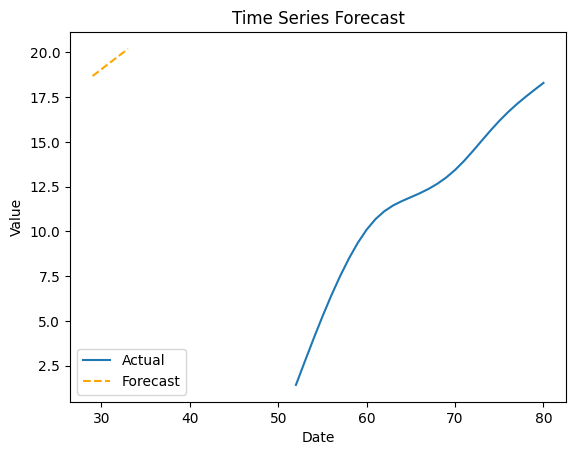

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

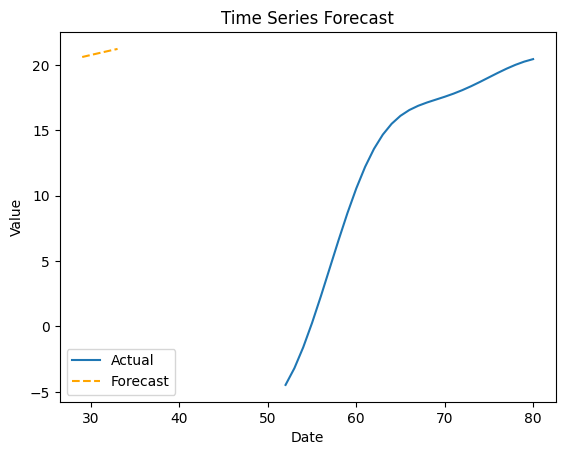

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

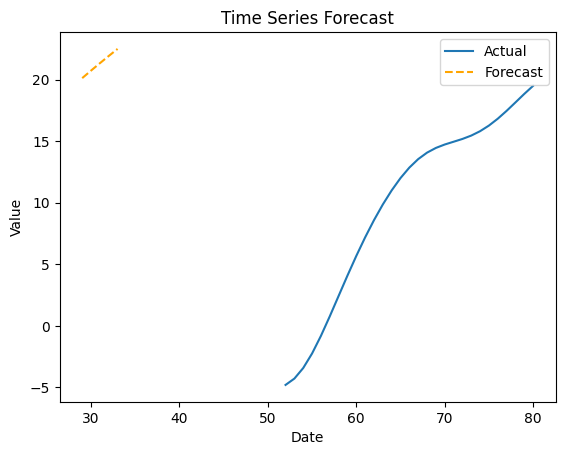

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

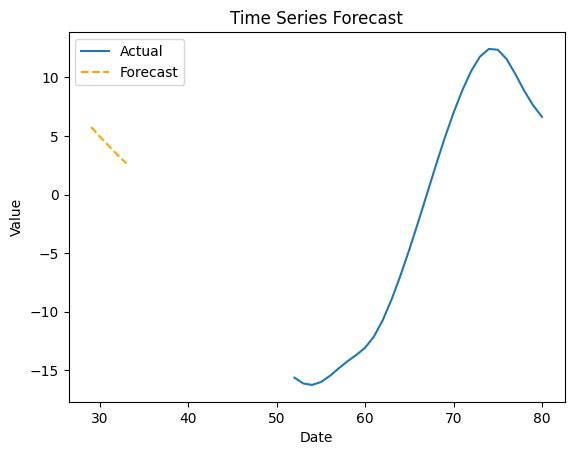

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

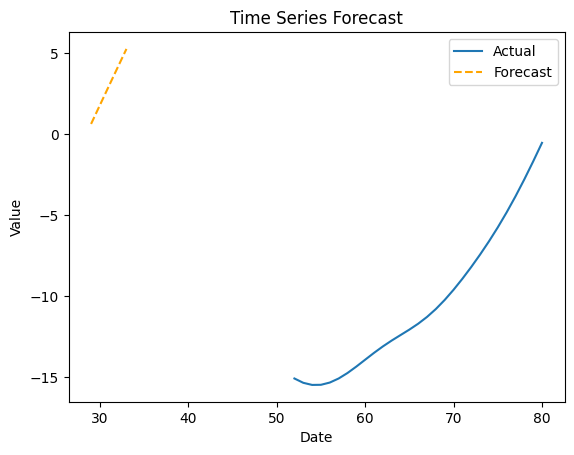

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

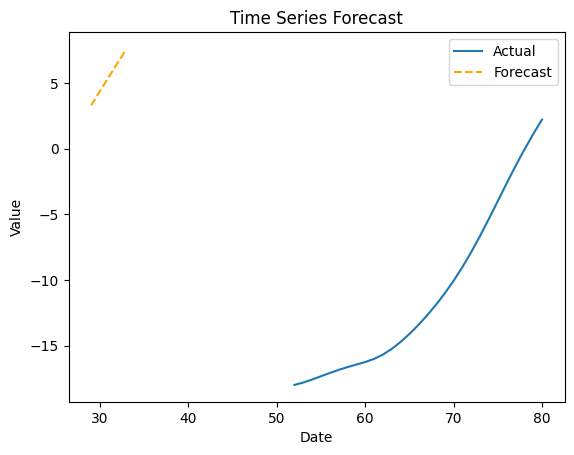

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


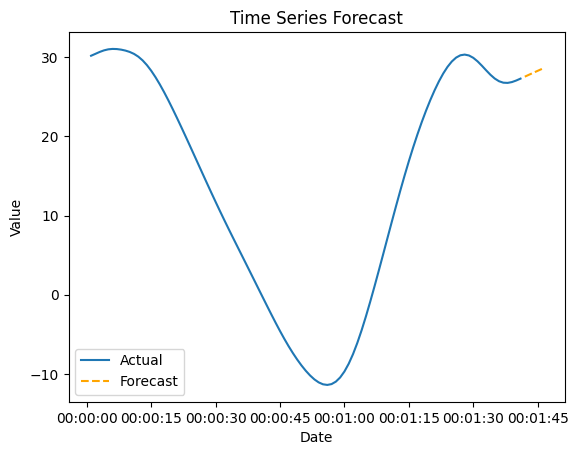

[24.25078621 23.4179813  22.58761862 21.7596925  20.9341973 ]


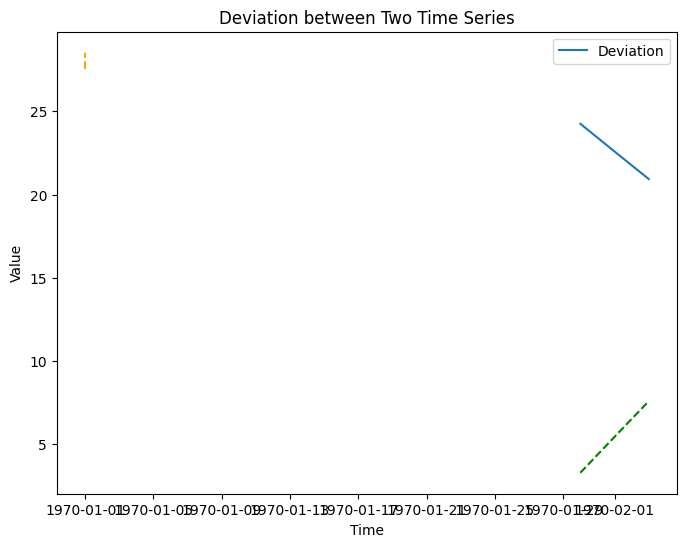

In [ ]:
PlotFunction(5,5)

V1 mean: -22.87680270673077
V2 mean: -25.114824466666665
V3 mean: -30.891478816666666
V4 mean: -7.766371908256881
V5 mean: -7.717305429906544
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  N

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

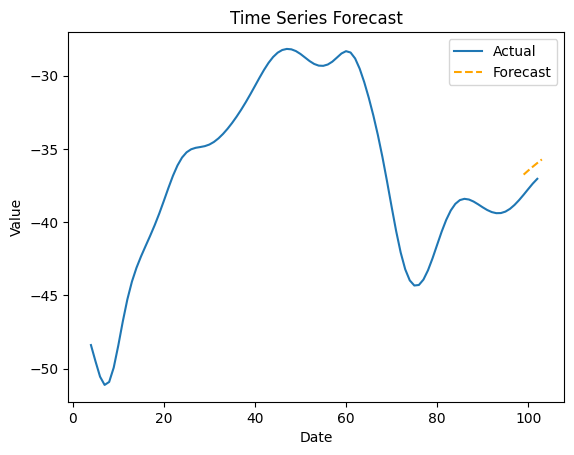

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

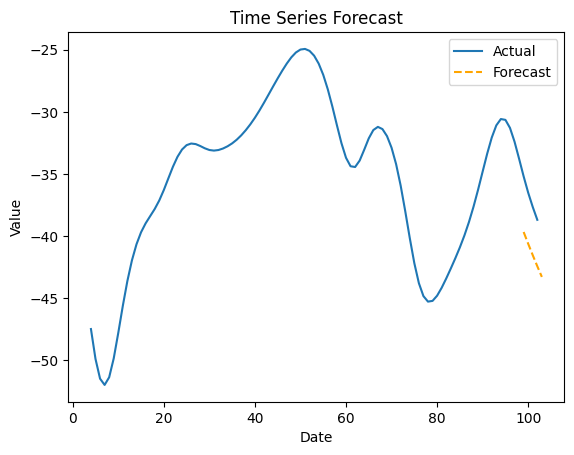

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

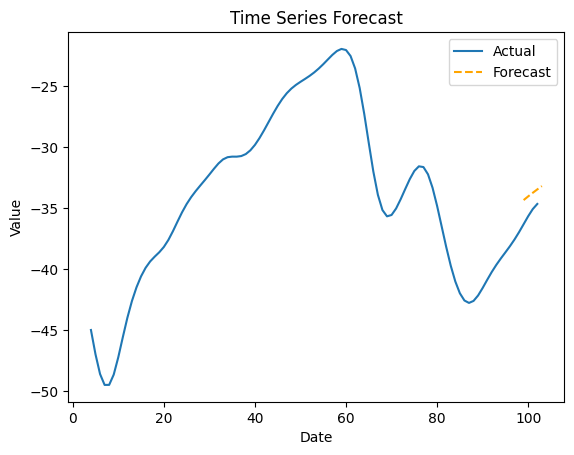

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

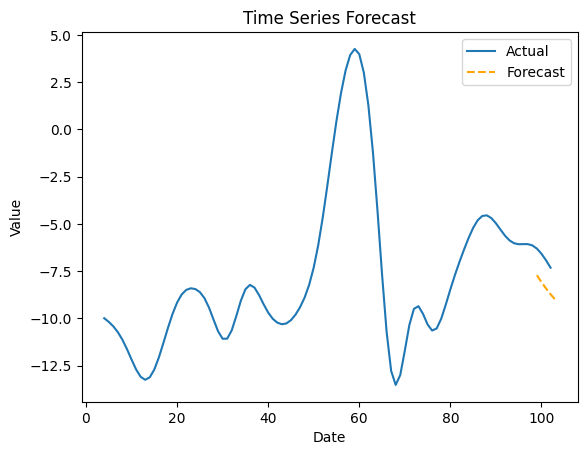

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

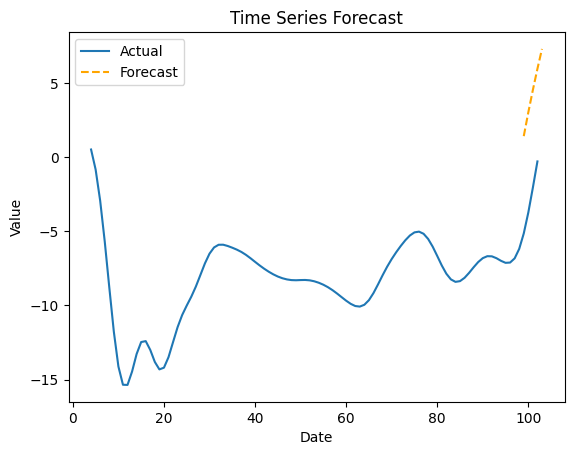

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

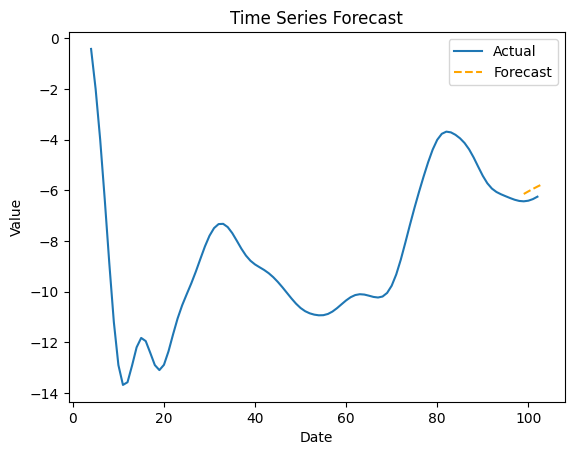

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


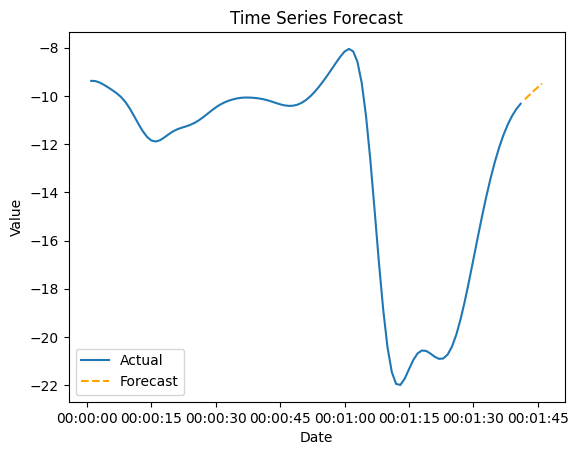

[-3.9966119  -3.92373232 -3.85358781 -3.78607854 -3.72110819]


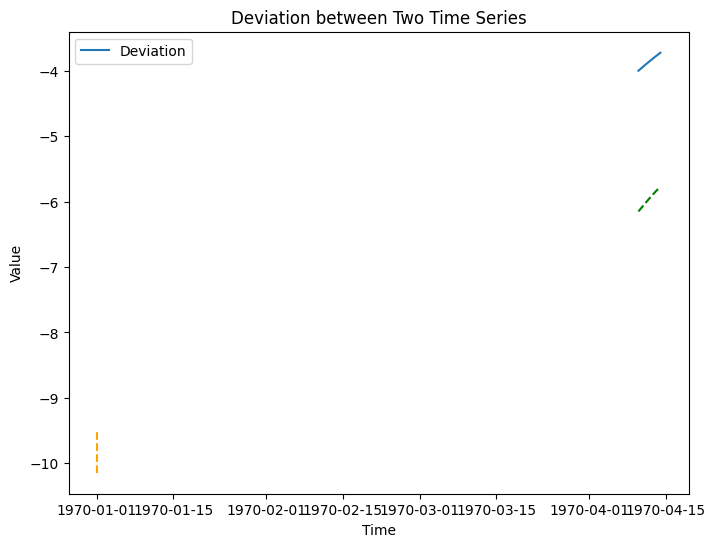

In [ ]:
PlotFunction(1,1)

V1 mean: 21.524330295081967
V2 mean: 22.745629375
V3 mean: 22.54275847368421
V4 mean: -2.6168631836734693
V5 mean: -5.976386551020408
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     object        
 14  NAN1    28 non-null     object        
 15  NAN2    2

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

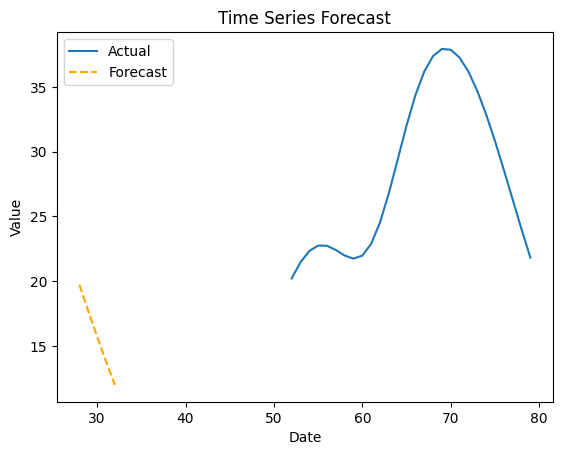

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     object        
 14  NAN1    28 non-null     object        
 15  NAN2    28 non-null     object        
 16  NAN3    28 non-null     object        
 17  NAN4    28 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

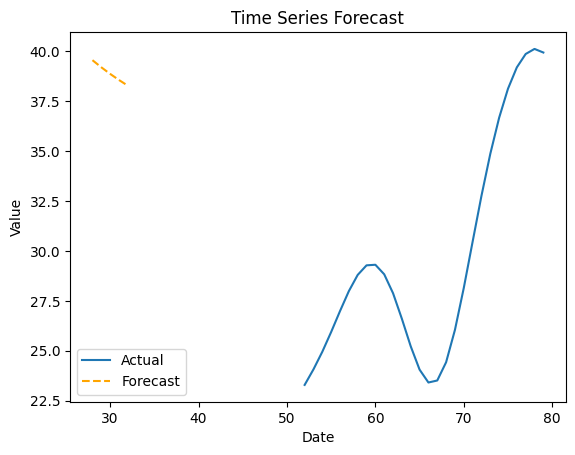

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     float64       
 14  NAN1    28 non-null     object        
 15  NAN2    28 non-null     object        
 16  NAN3    28 non-null     object        
 17  NAN4    28 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

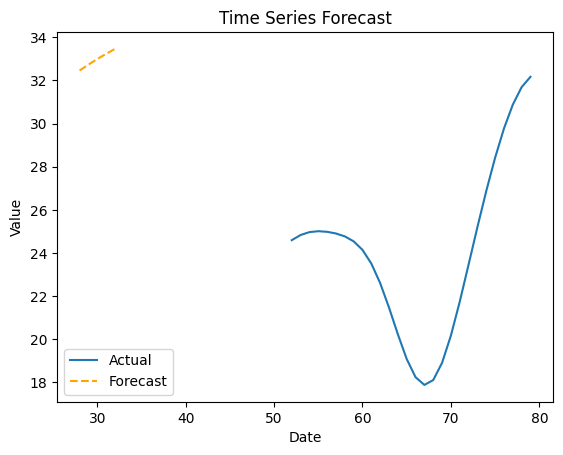

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     float64       
 14  NAN1    28 non-null     object        
 15  NAN2    28 non-null     object        
 16  NAN3    28 non-null     object        
 17  NAN4    28 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

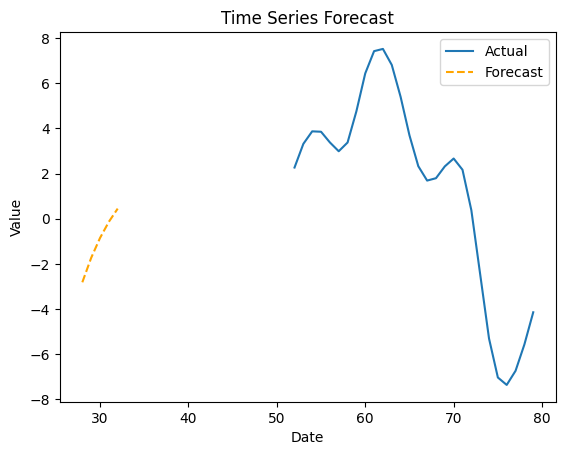

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     float64       
 14  NAN1    28 non-null     object        
 15  NAN2    28 non-null     object        
 16  NAN3    28 non-null     object        
 17  NAN4    28 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

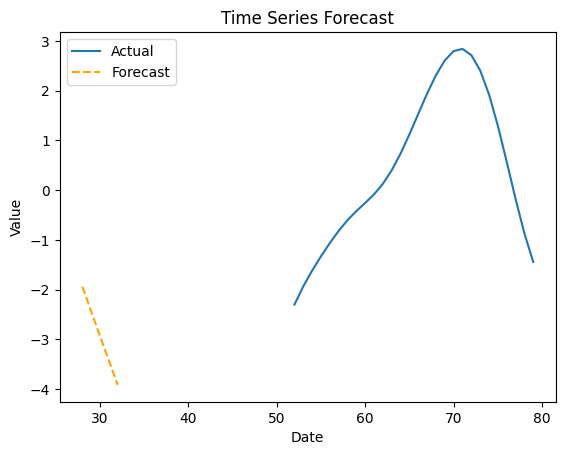

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     float64       
 14  NAN1    28 non-null     object        
 15  NAN2    28 non-null     object        
 16  NAN3    28 non-null     object        
 17  NAN4    28 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

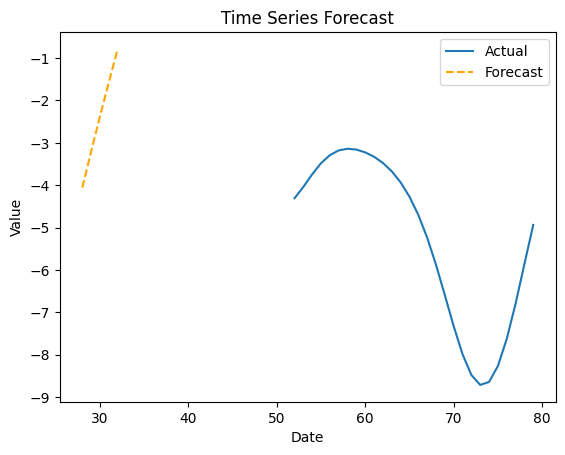

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 52 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      28 non-null     int64         
 1   NAN     28 non-null     object        
 2   T1      28 non-null     datetime64[ns]
 3   V1      28 non-null     float64       
 4   T2      28 non-null     datetime64[ns]
 5   V2      28 non-null     float64       
 6   T3      28 non-null     datetime64[ns]
 7   V3      28 non-null     float64       
 8   T4      28 non-null     datetime64[ns]
 9   V4      28 non-null     float64       
 10  T5      28 non-null     datetime64[ns]
 11  V5      28 non-null     float64       
 12  X1      28 non-null     datetime64[ns]
 13  X2      28 non-null     float64       
 14  NAN1    28 non-null     object        
 15  NAN2    28 non-null     object        
 16  NAN3    28 non-null     object        
 17  NAN4    28 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


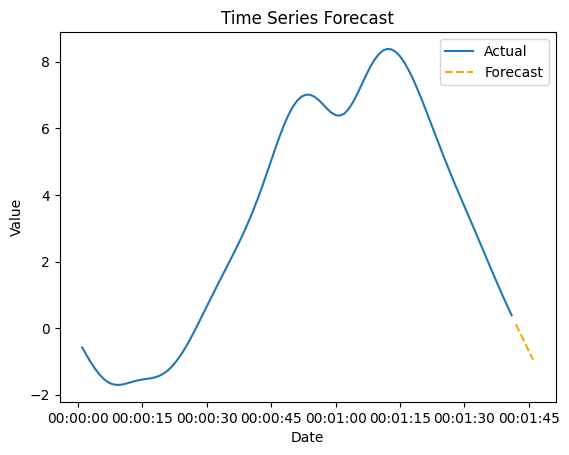

[ 4.17205506  3.04856813  1.95147722  0.8800681  -0.16635331]


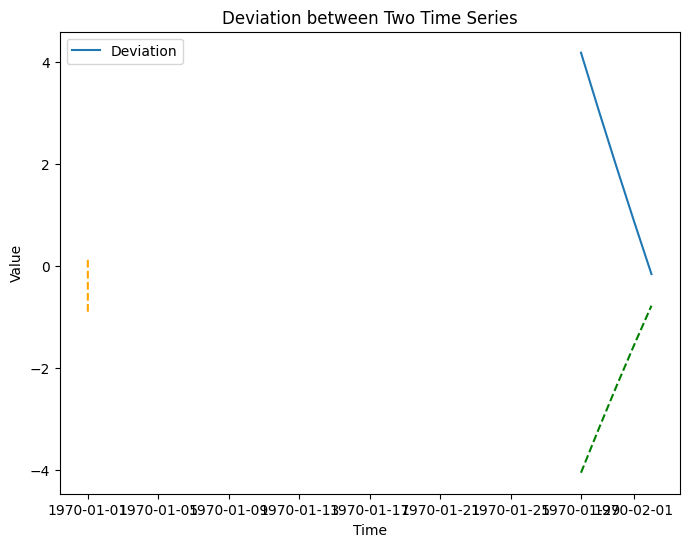

In [ ]:
PlotFunction(2,2)

V1 mean: -16.370124505050505
V2 mean: -17.58962486868687
V3 mean: -6.359915151515152
V4 mean: -26.52157332323232
V5 mean: -22.7534087979798
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


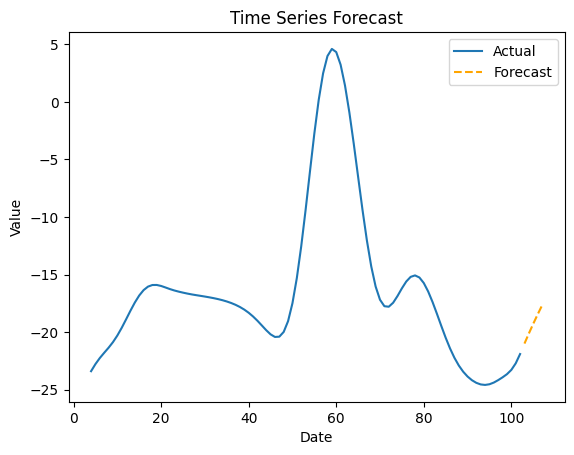

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


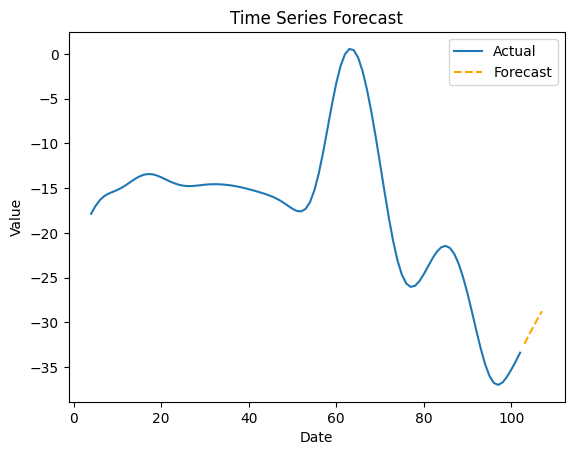

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


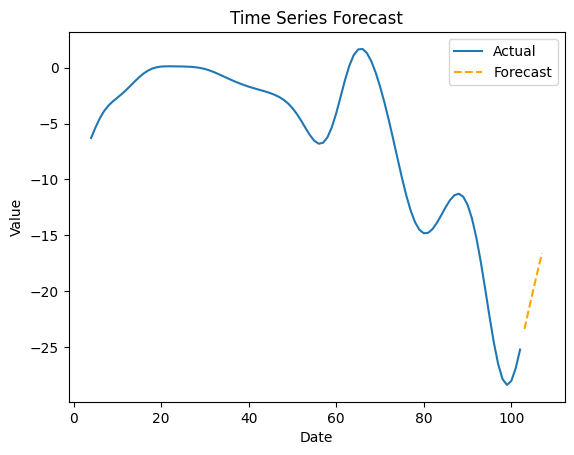

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


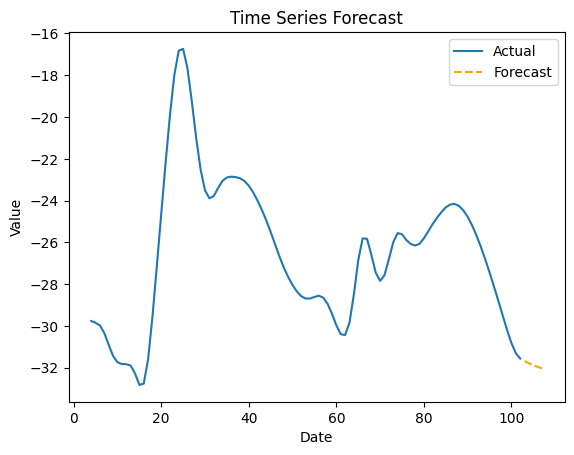

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


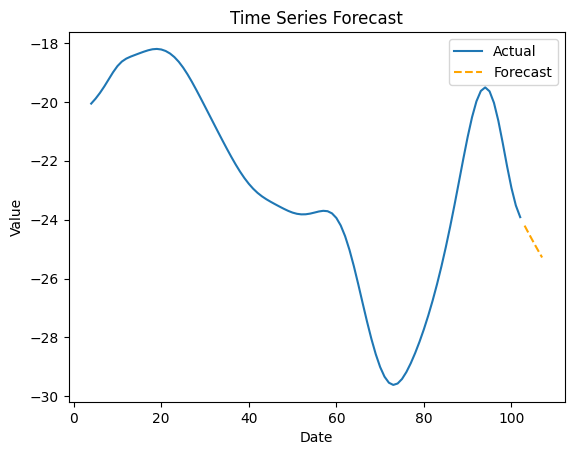

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


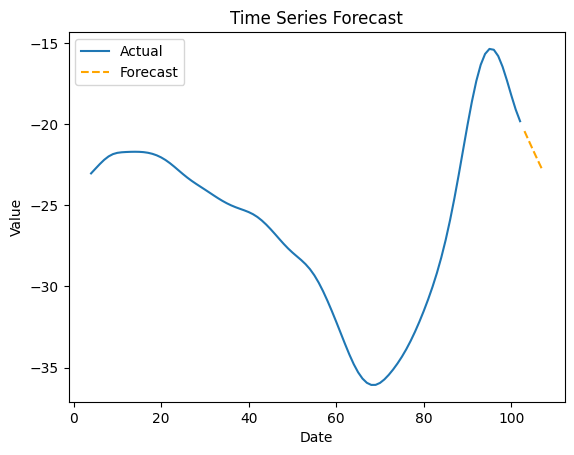

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


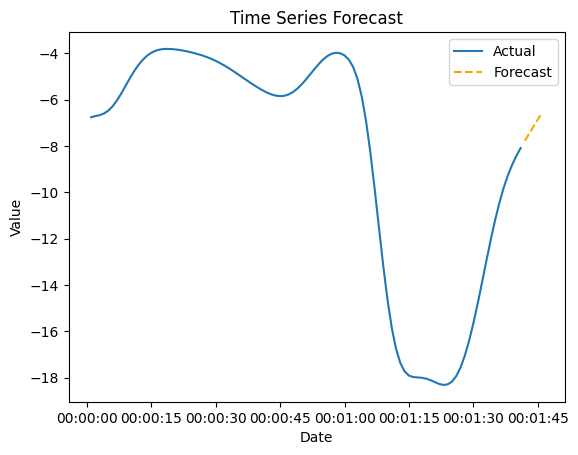

[12.65326672 13.56468821 14.45921332 15.33716353 16.19885401]


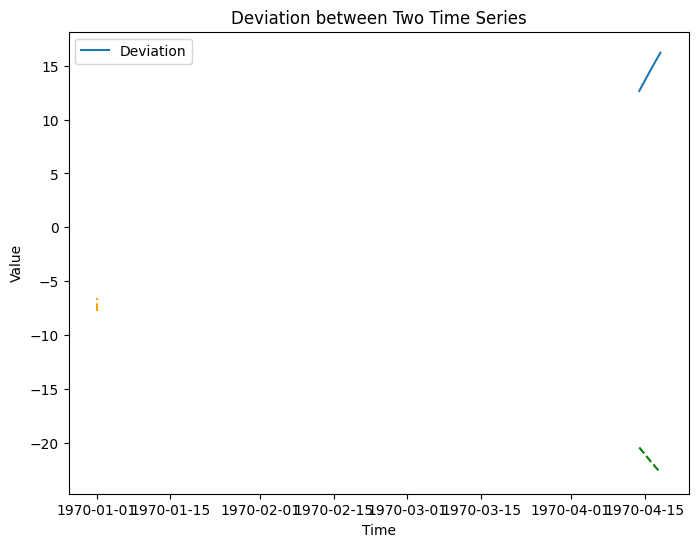

In [ ]:
PlotFunction(4,4)

V1 mean: -13.958039363636363
V2 mean: -15.520008242424243
V3 mean: -4.90870404040404
V4 mean: 10.213547888888886
V5 mean: 15.216496868686868
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NA

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


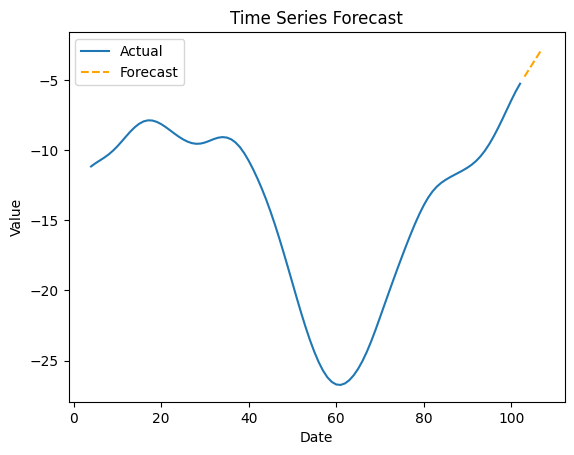

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


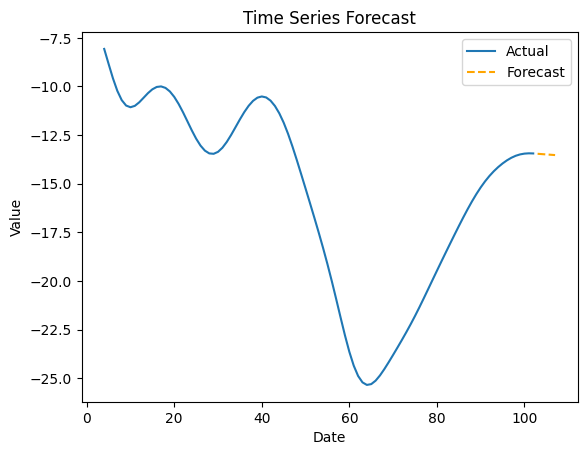

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


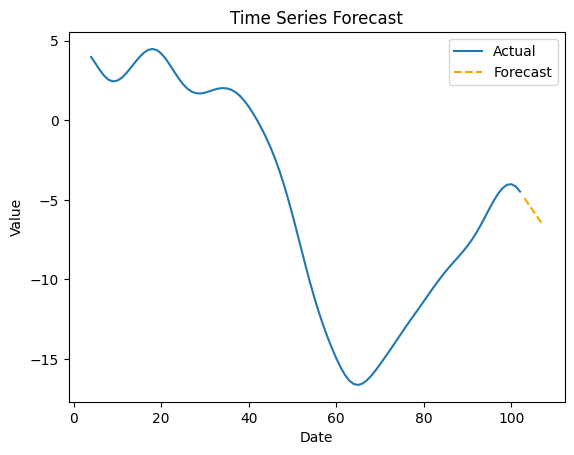

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


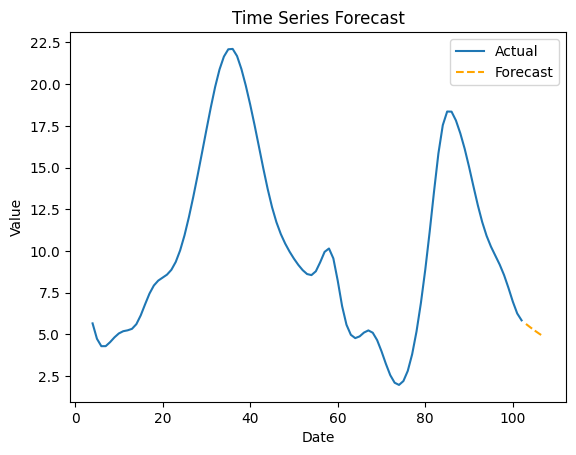

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


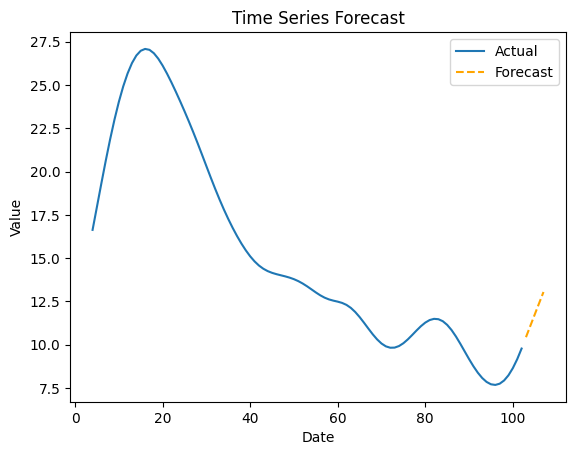

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


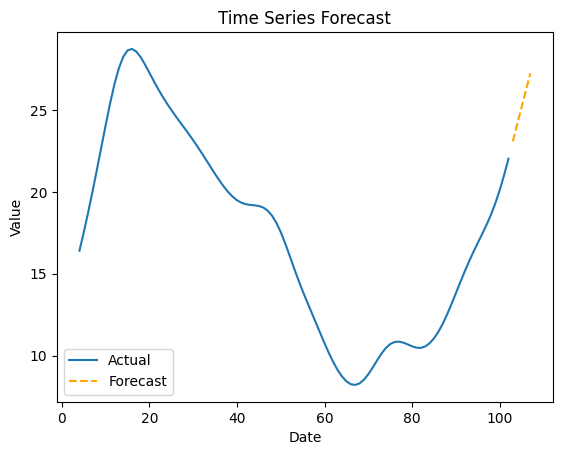

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


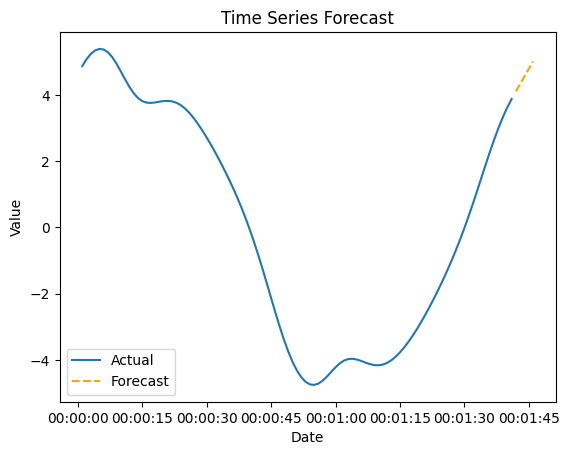

[-18.98100907 -19.80225291 -20.61946243 -21.43265744 -22.24185765]


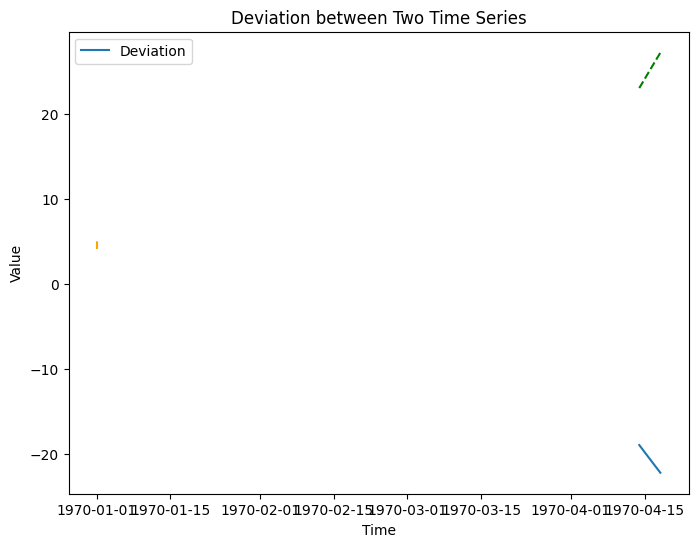

In [ ]:
PlotFunction(6,6)

V1 mean: 2.1144611313131314
V2 mean: 1.1091281717171717
V3 mean: 0.9695394747474749
V4 mean: -0.24930701010101014
V5 mean: -1.079174656565657
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  N

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


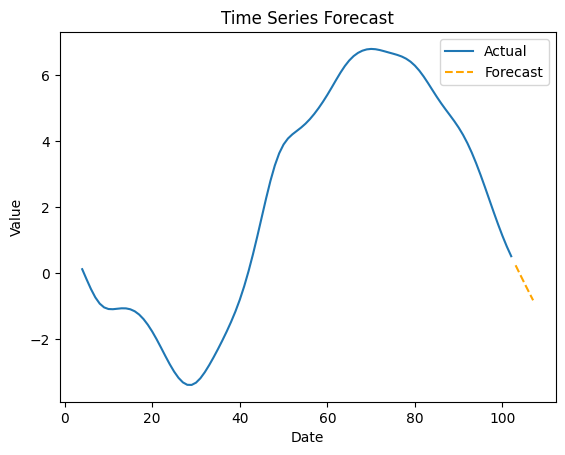

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


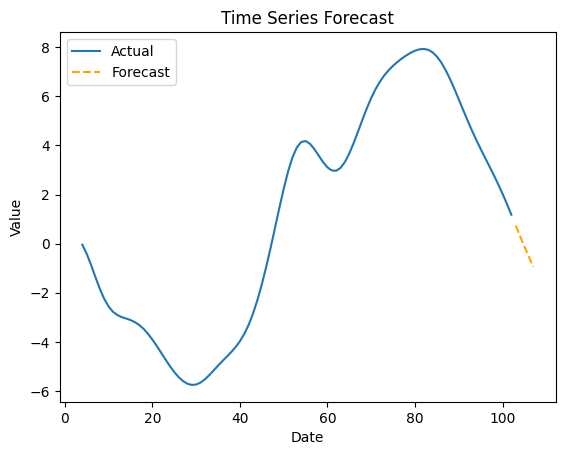

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


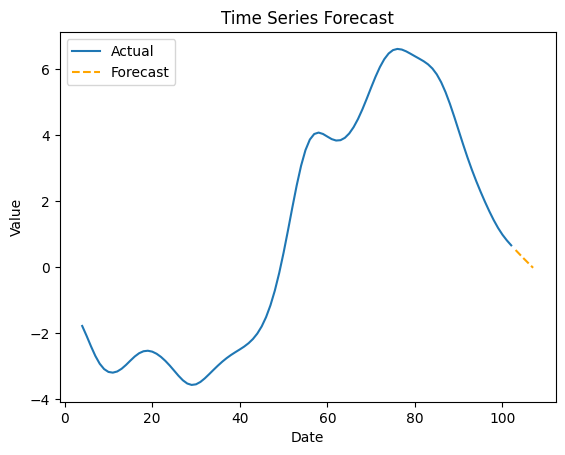

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


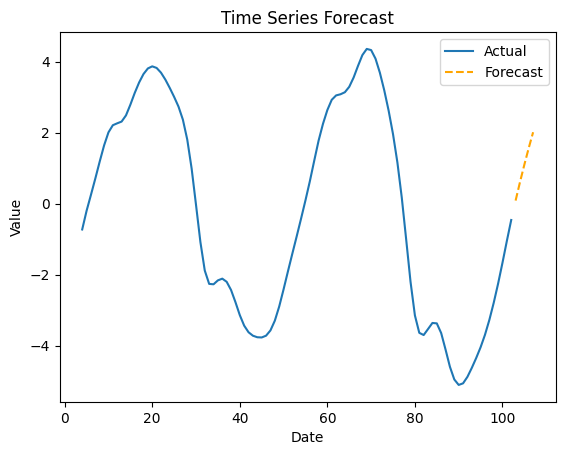

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


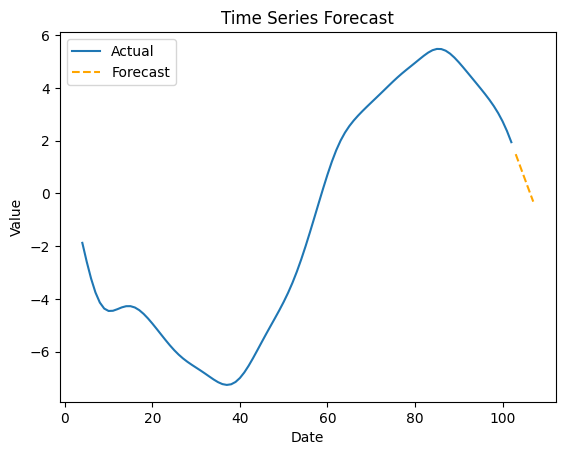

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


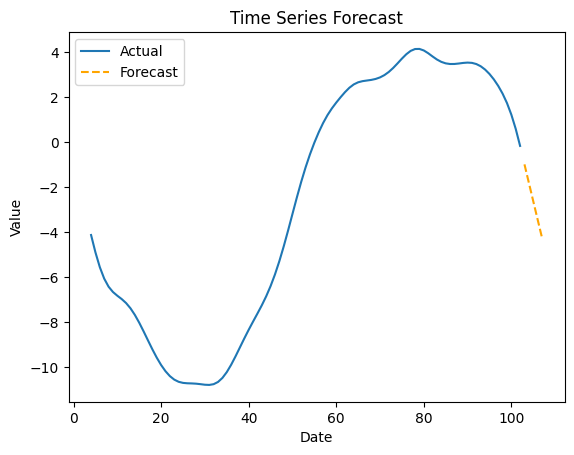

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


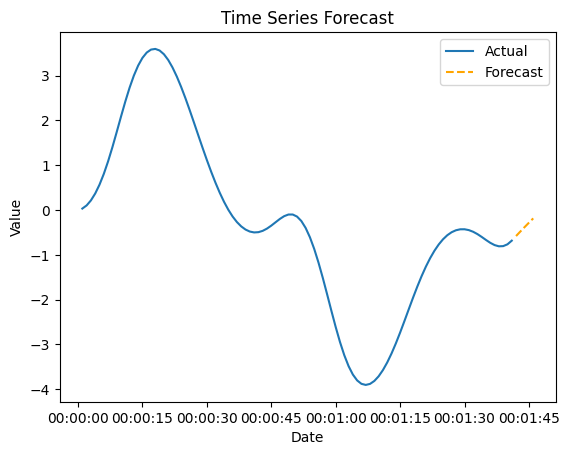

[0.40484441 1.3231587  2.23755905 3.14808015 4.05475617]


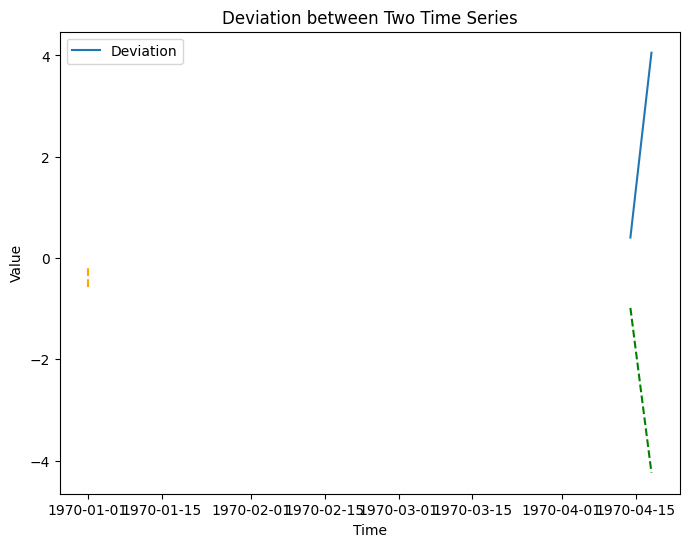

In [ ]:
PlotFunction(7,7)

V1 mean: 24.338084661290324
V2 mean: 18.120758851851853
V3 mean: 16.40371690909091
V4 mean: -26.90280719191919
V5 mean: -24.291598484848485
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

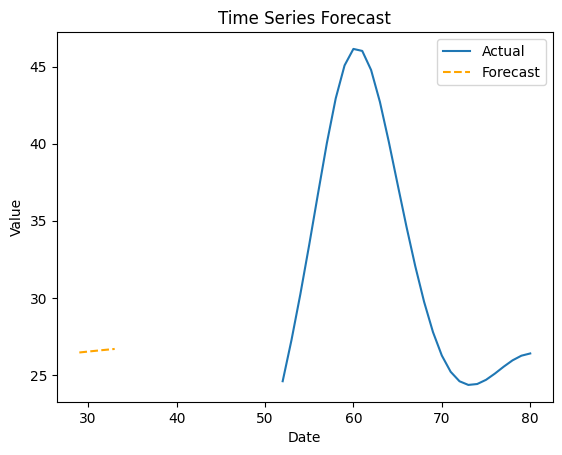

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

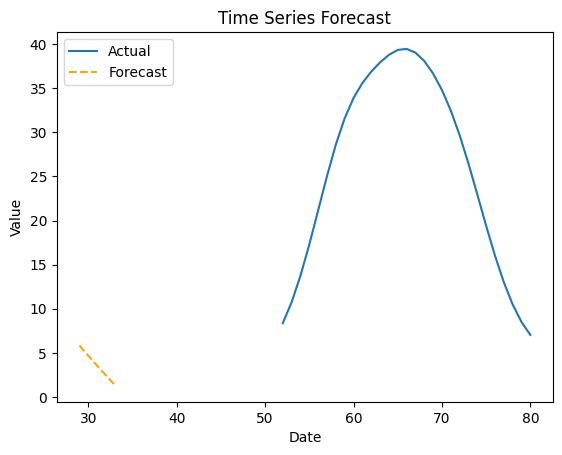

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

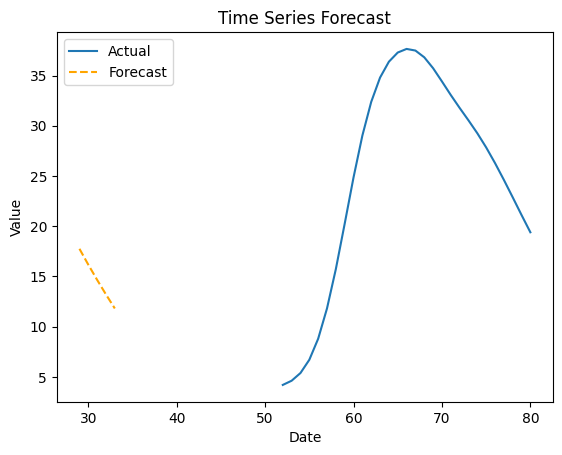

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

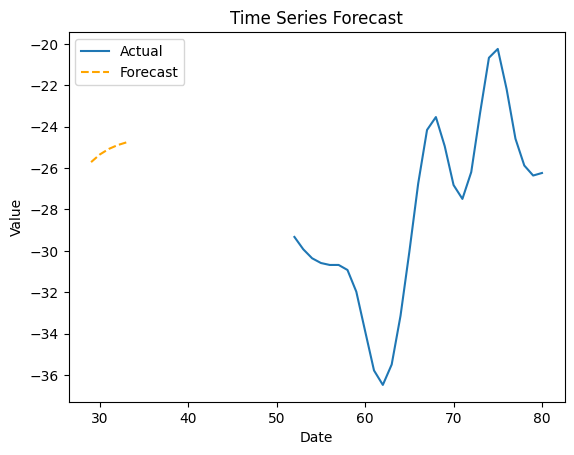

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

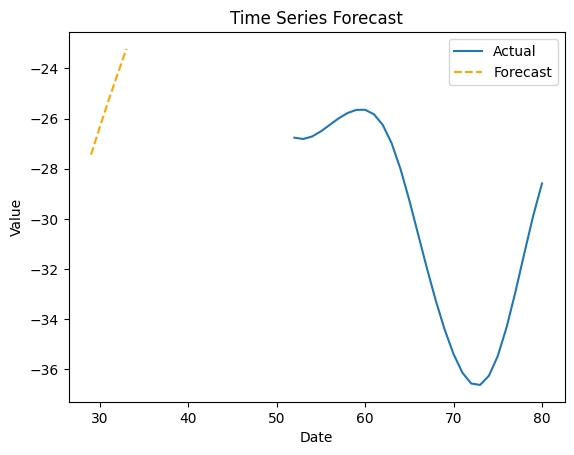

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

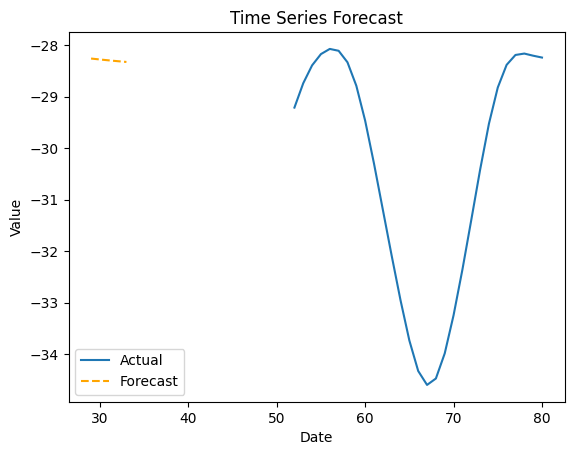

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


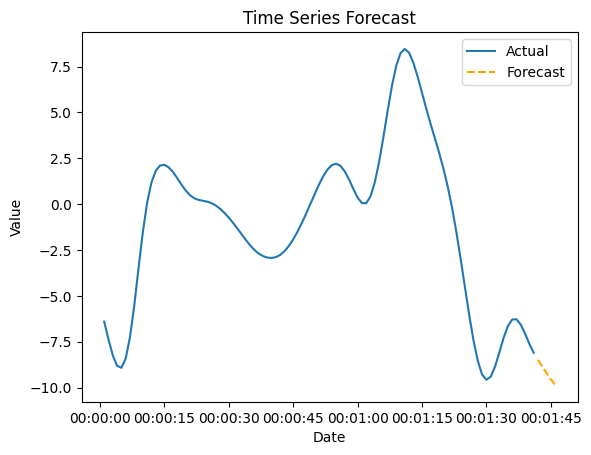

[19.77228872 19.42141875 19.08789662 18.77086786 18.46951987]


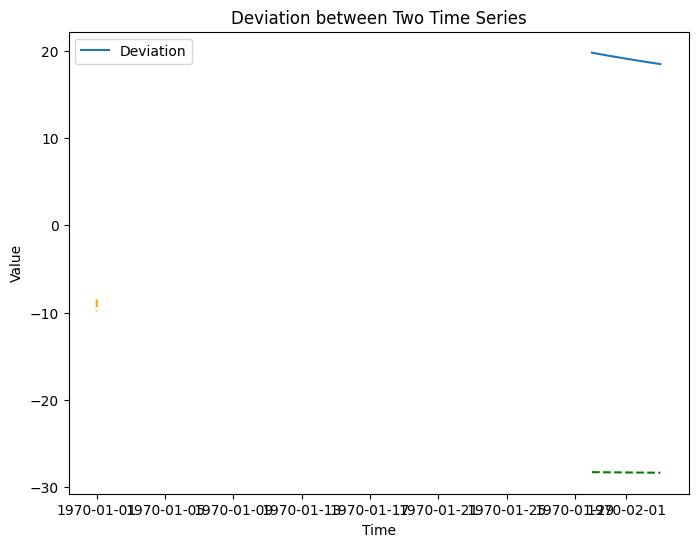

In [ ]:
PlotFunction(8,8)

V1 mean: -1.8881021111111111
V2 mean: -1.6925496565656566
V3 mean: -1.1525839595959597
V4 mean: -2.2458572323232326
V5 mean: -3.127229000000001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15 

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


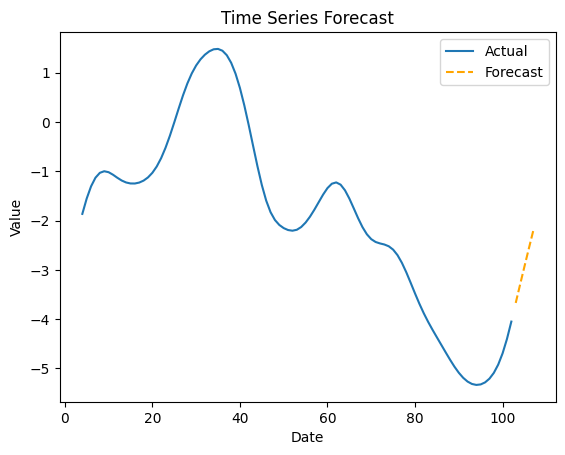

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


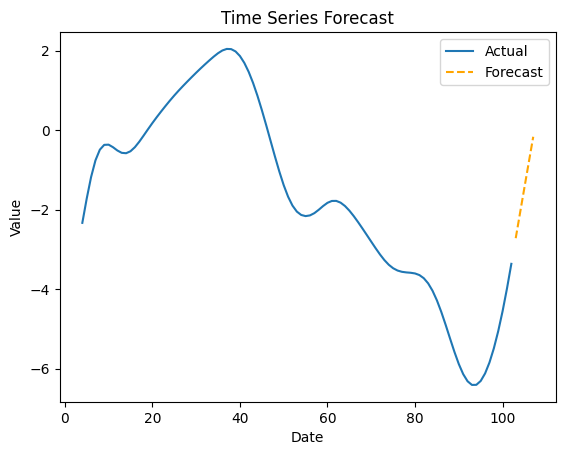

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


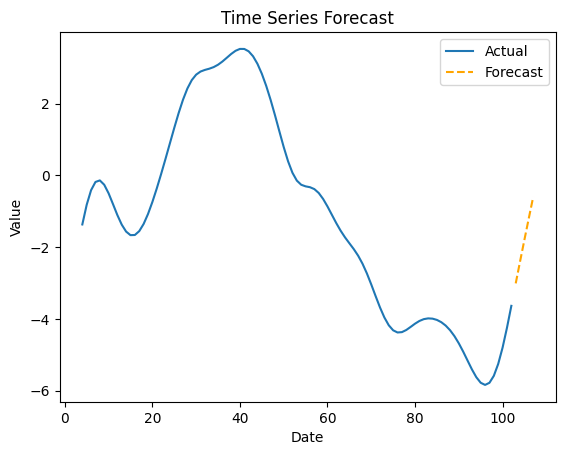

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


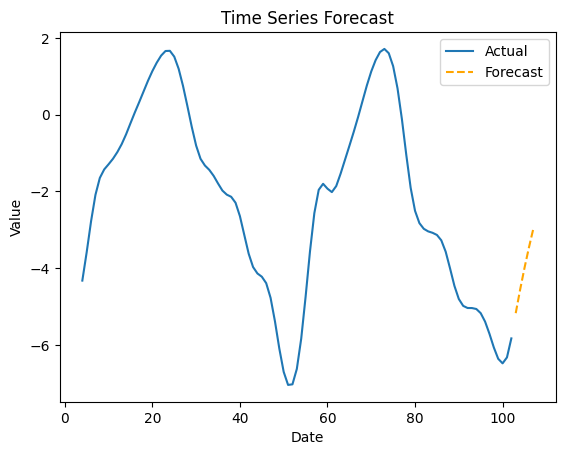

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


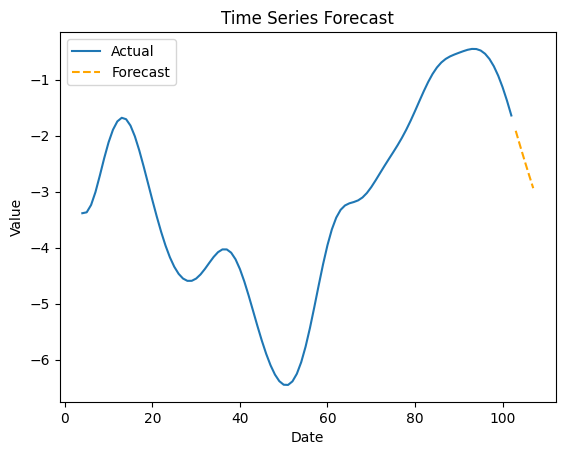

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


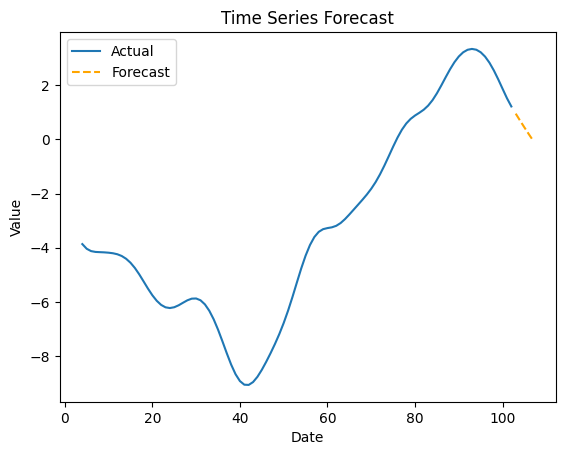

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


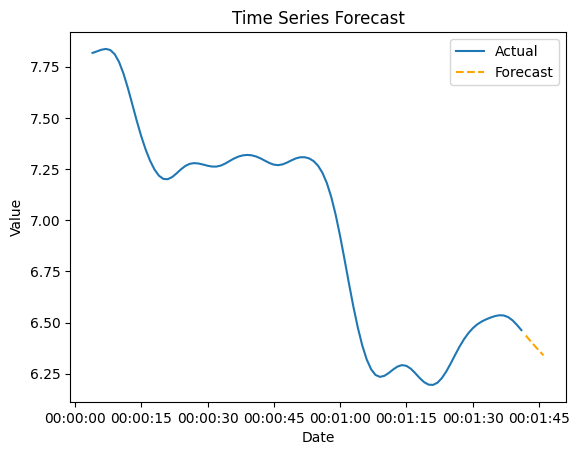

[5.48622598 5.72005913 5.94855942 6.1718462  6.39003619]


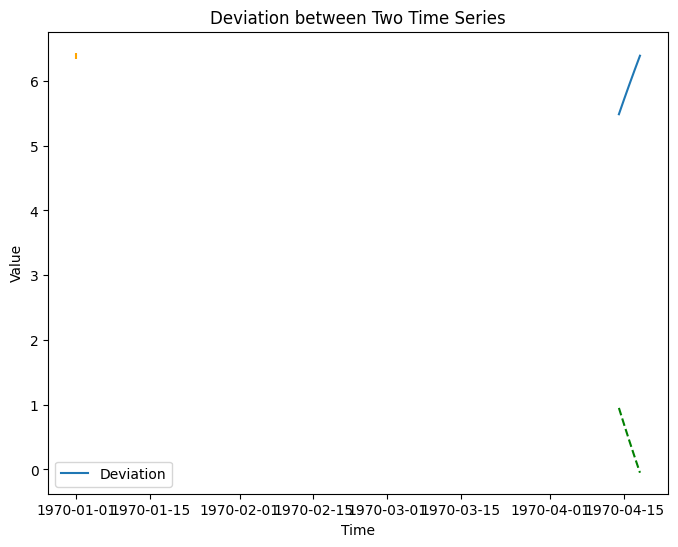

In [ ]:
PlotFunction(9,9)

V1 mean: -1.5764024918032786
V2 mean: -1.6846257407407408
V3 mean: -1.0691044675324675
V4 mean: 3.802958282828283
V5 mean: 2.775466080808081
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NA

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

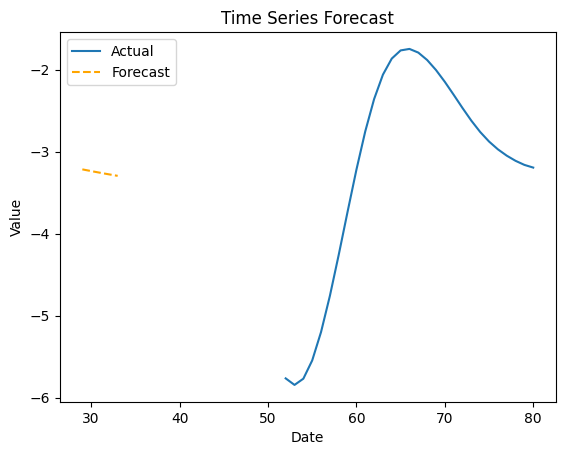

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

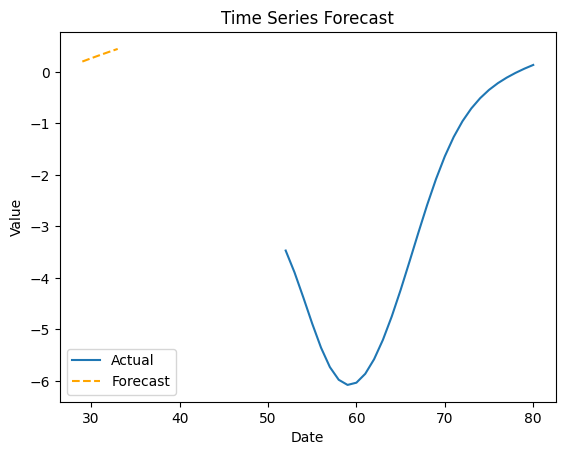

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

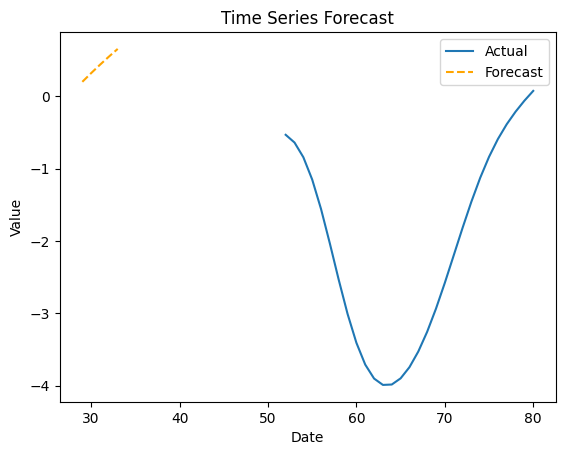

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

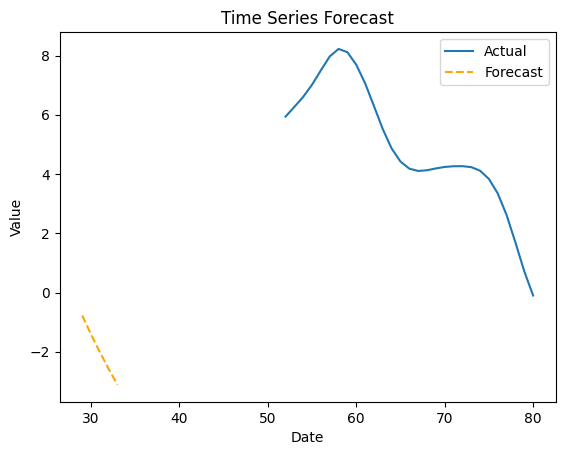

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

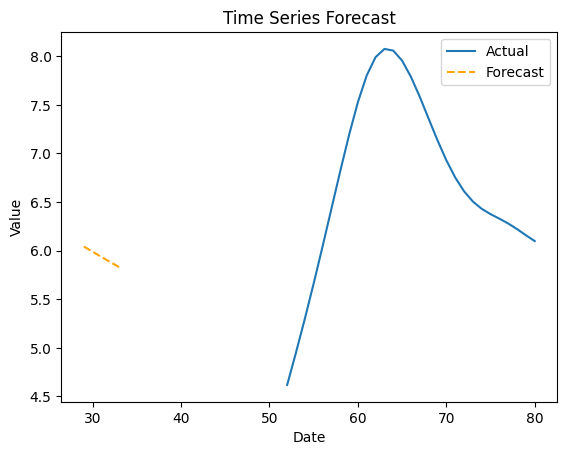

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

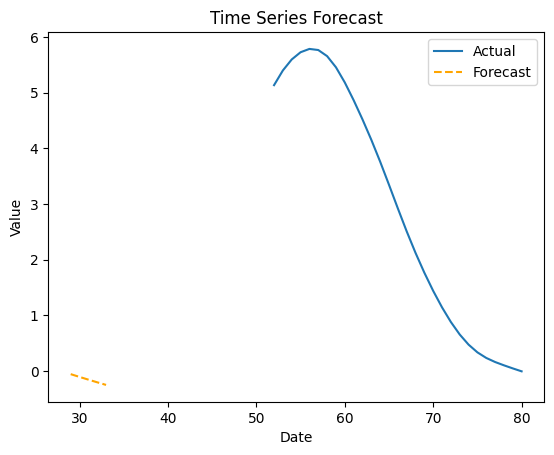

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


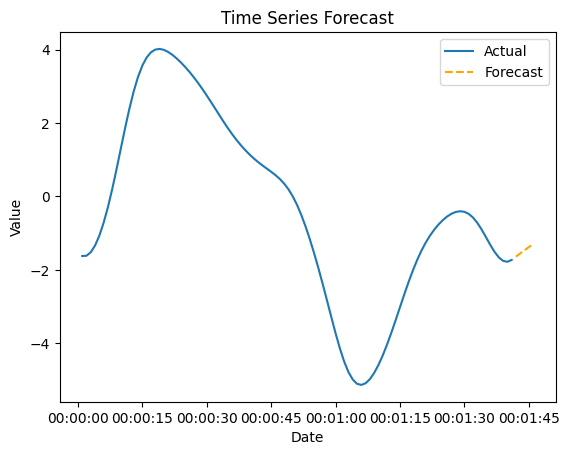

[-1.58721759 -1.44920385 -1.31400882 -1.18157477 -1.05184513]


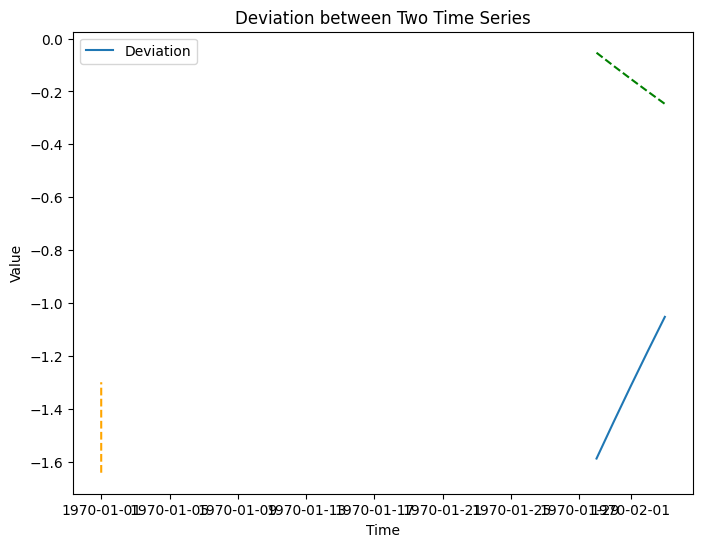

In [ ]:
PlotFunction(10,10)

V1 mean: 4.431089181818182
V2 mean: 3.511547525252525
V3 mean: 3.2722442525252524
V4 mean: 4.689401303030303
V5 mean: 4.409153515151515
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2   

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


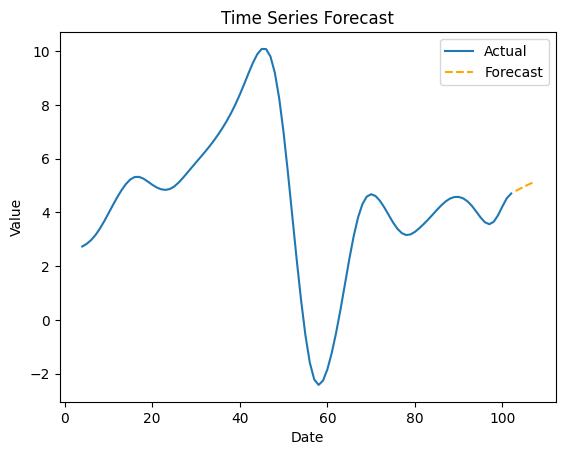

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     object        
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


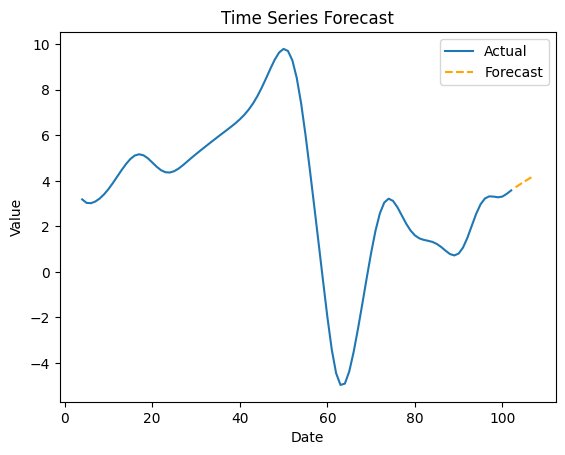

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


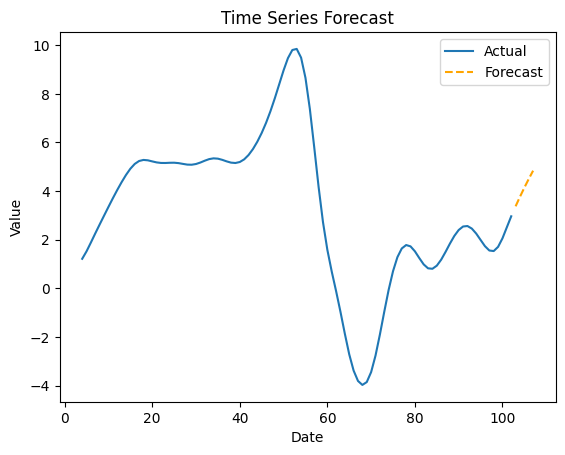

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


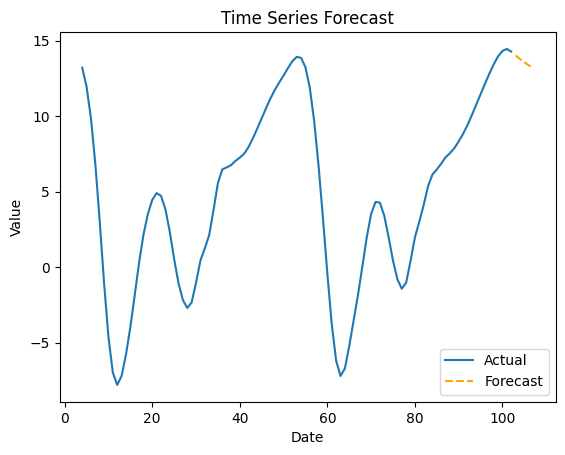

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


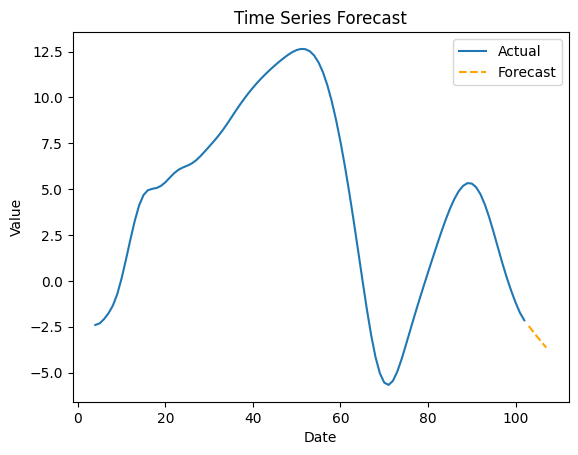

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


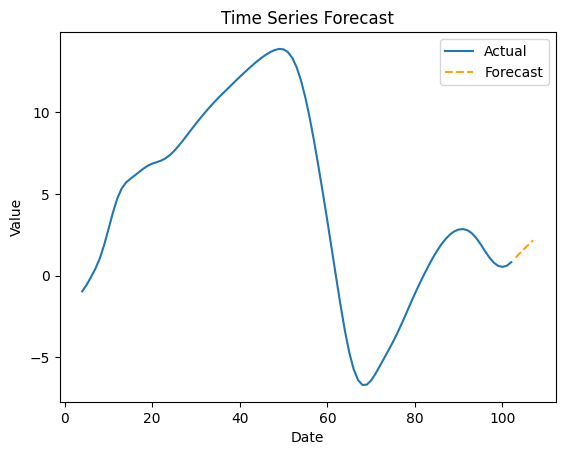

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 4 to 102
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      99 non-null     int64         
 1   NAN     99 non-null     object        
 2   T1      99 non-null     datetime64[ns]
 3   V1      99 non-null     float64       
 4   T2      99 non-null     datetime64[ns]
 5   V2      99 non-null     float64       
 6   T3      99 non-null     datetime64[ns]
 7   V3      99 non-null     float64       
 8   T4      99 non-null     datetime64[ns]
 9   V4      99 non-null     float64       
 10  T5      99 non-null     datetime64[ns]
 11  V5      99 non-null     float64       
 12  X1      99 non-null     datetime64[ns]
 13  X2      99 non-null     float64       
 14  NAN1    99 non-null     object        
 15  NAN2    99 non-null     object        
 16  NAN3    99 non-null     object        
 17  NAN4    99 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


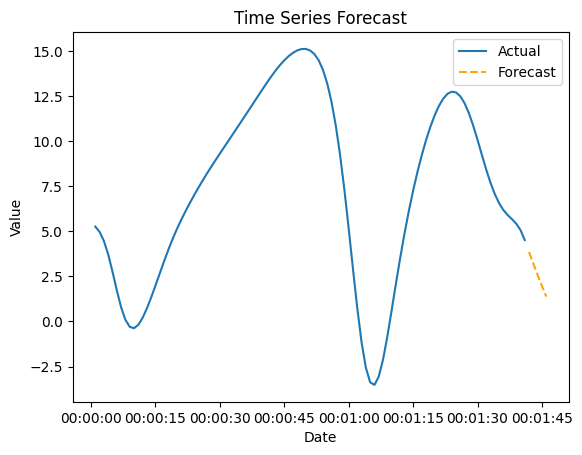

[ 2.74964146  1.82795807  0.93329358  0.06484464 -0.77816791]


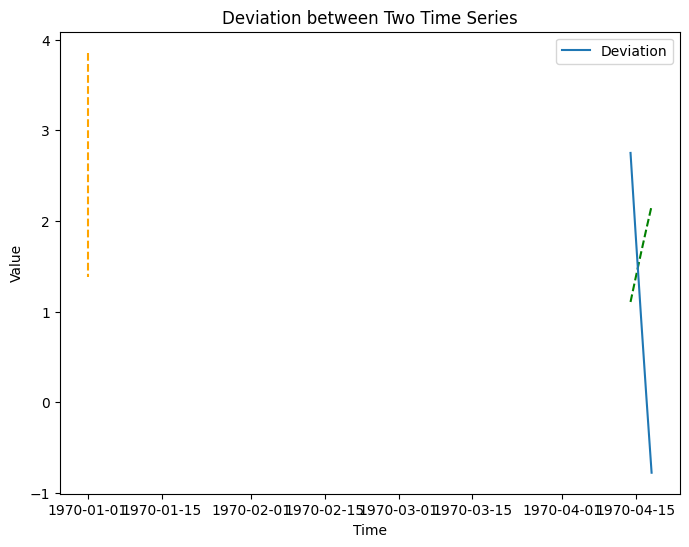

In [ ]:
PlotFunction(11,11)

V1 mean: 41.60842721311475
V2 mean: 35.250996061728394
V3 mean: 32.43160224675325
V4 mean: 18.594798505050505
V5 mean: 18.829370272727274
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2 

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

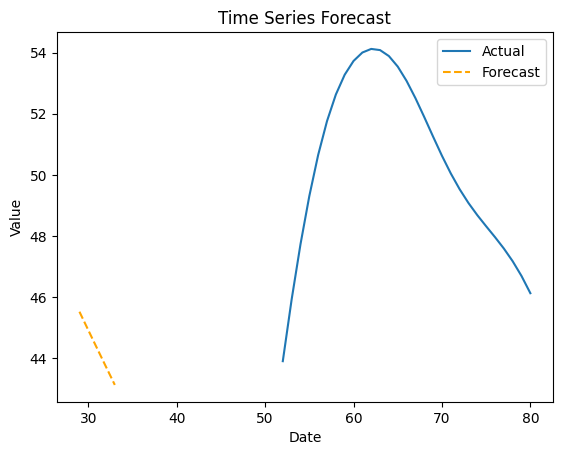

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

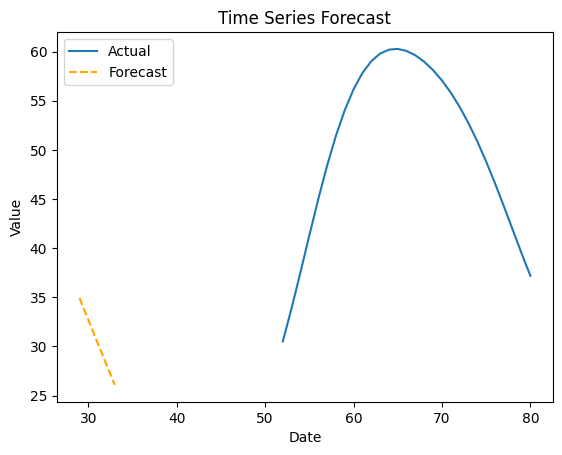

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

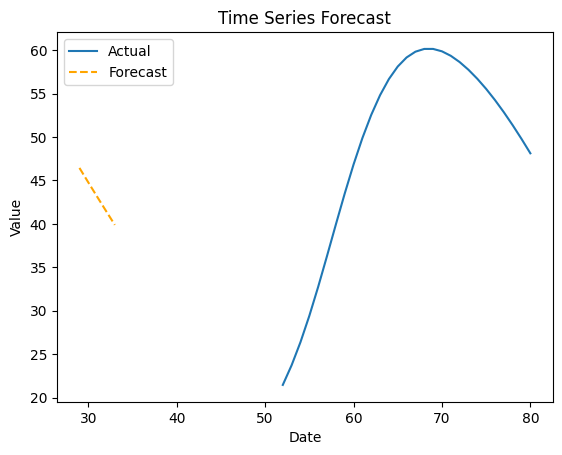

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

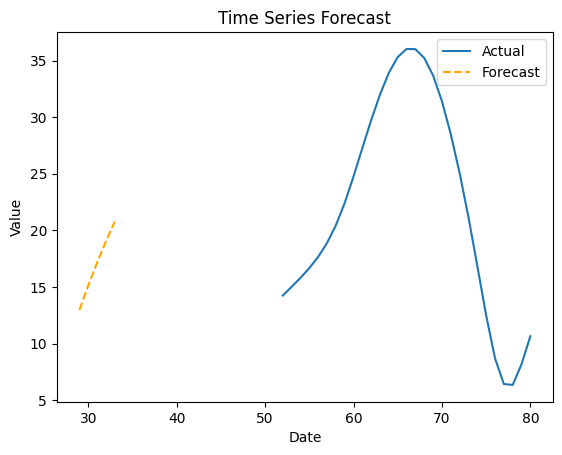

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


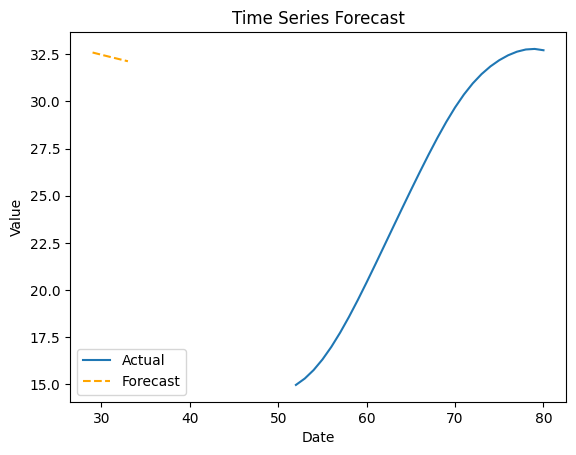

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

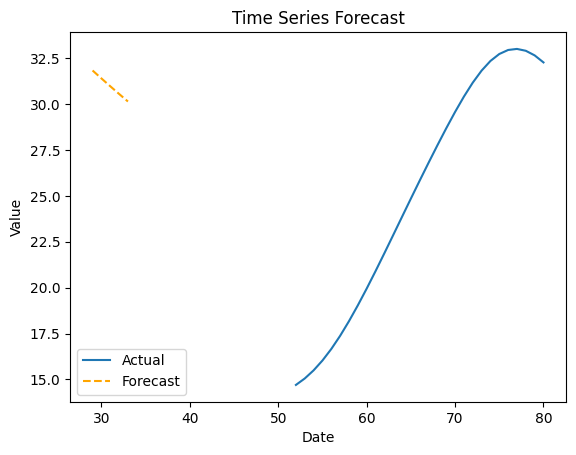

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


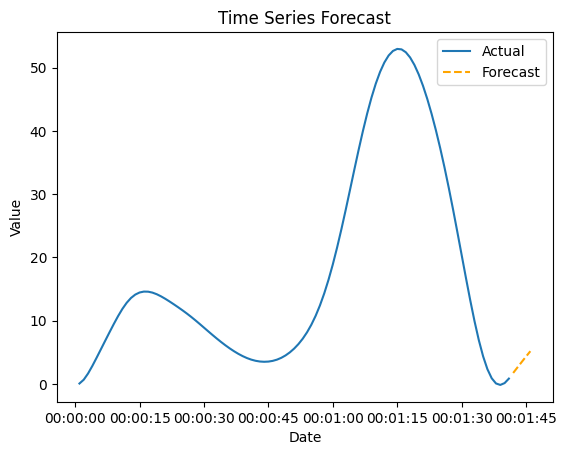

[-30.09651815 -28.78473745 -27.49259454 -26.2197946  -24.96604723]


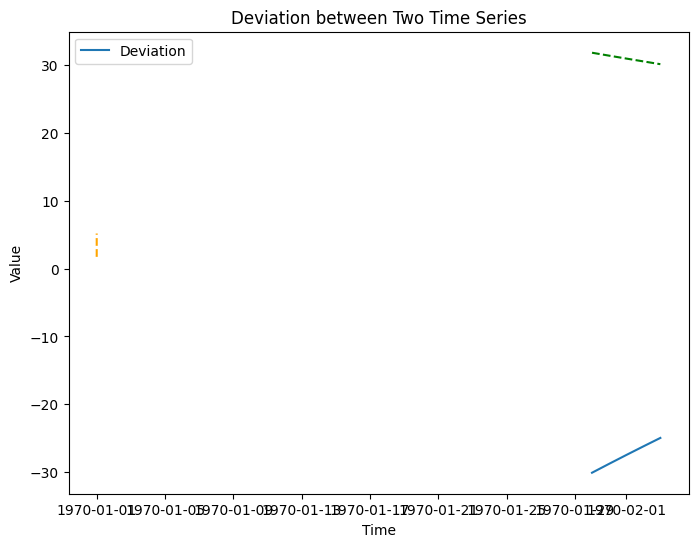

In [ ]:
PlotFunction(12,12)

V1 mean: 16.87334649180328
V2 mean: 15.96577708641975
V3 mean: 13.19387553246753
V4 mean: 4.6297056969696975
V5 mean: 3.714015272727273
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2   

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

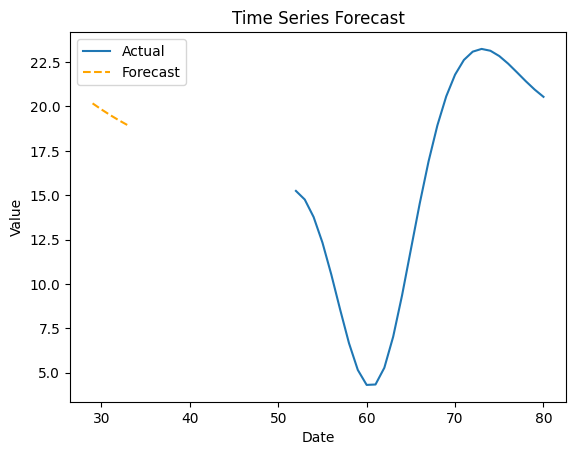

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     object        
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

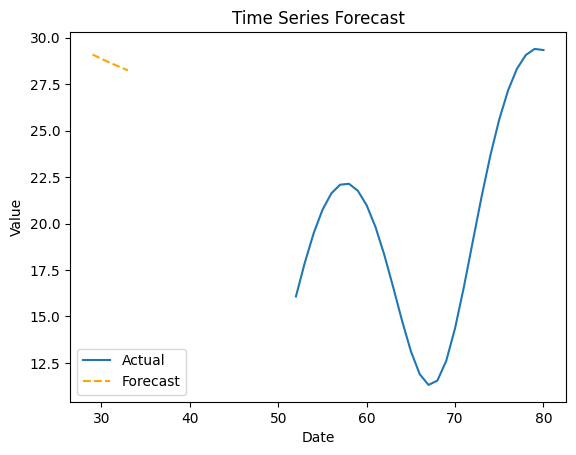

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

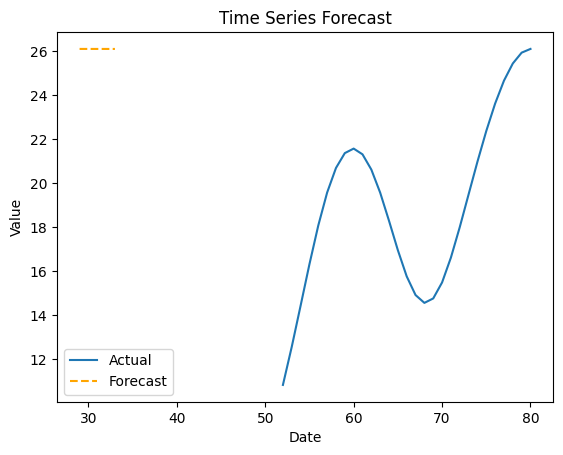

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

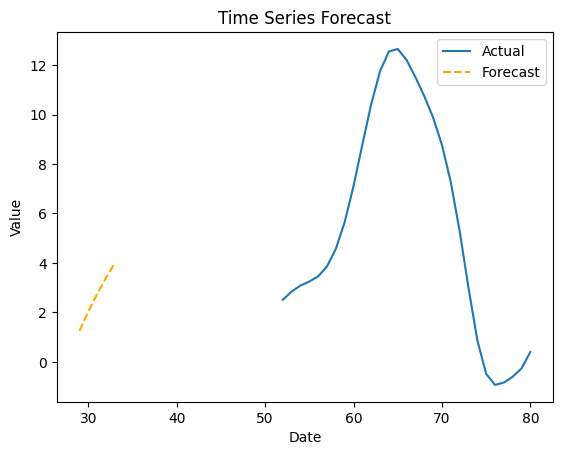

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

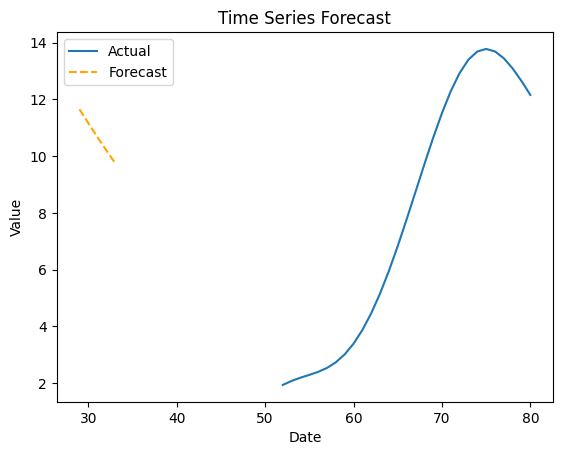

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an i

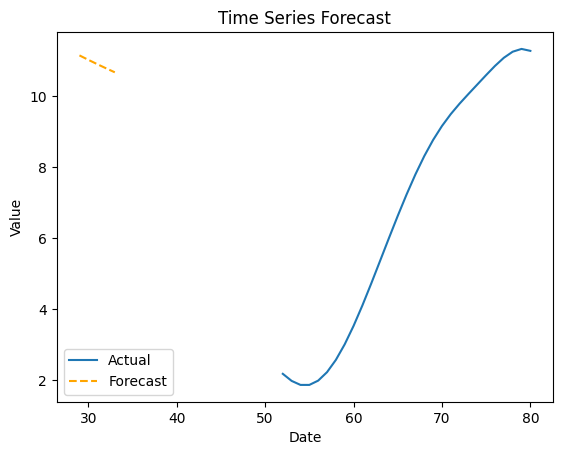

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 52 to 80
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      29 non-null     int64         
 1   NAN     29 non-null     object        
 2   T1      29 non-null     datetime64[ns]
 3   V1      29 non-null     float64       
 4   T2      29 non-null     datetime64[ns]
 5   V2      29 non-null     float64       
 6   T3      29 non-null     datetime64[ns]
 7   V3      29 non-null     float64       
 8   T4      29 non-null     datetime64[ns]
 9   V4      29 non-null     float64       
 10  T5      29 non-null     datetime64[ns]
 11  V5      29 non-null     float64       
 12  X1      29 non-null     datetime64[ns]
 13  X2      29 non-null     float64       
 14  NAN1    29 non-null     object        
 15  NAN2    29 non-null     object        
 16  NAN3    29 non-null     object        
 17  NAN4    29 non-null     object        
dtypes: datetime

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


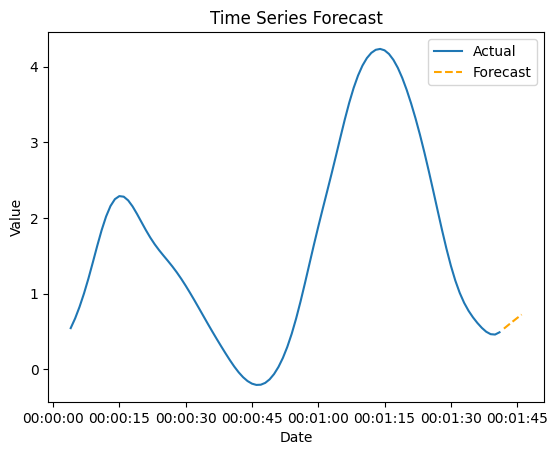

[-10.60318333 -10.43132421 -10.26390957 -10.1008207   -9.94194214]


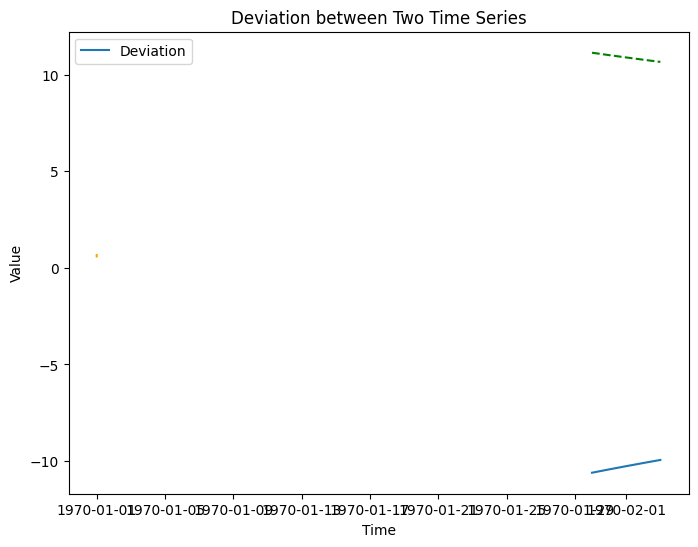

In [ ]:
PlotFunction(13,13)